# Integration of google drive

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# uploading the file to google drive

In [0]:
# Create & upload a text file, note that this is the code that  will upload the file with name 'sample file.txt' and its content as
# 'Sample upload file content' written in it.
uploaded = drive.CreateFile({'title': 'Sample file.txt'}) # whatever title we want to give (replace the 'Sample file.txt' with the title you want to give)
uploaded.SetContentString('Sample upload file content')   # whatever content we write in the file(replace 'Sample upload file content' with the content)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 16wspdllRp2Ttr5vgiyC8meXznl8ywfev


In [0]:
# demo to upload a new file
uploaded = drive.CreateFile({'title': 'demo_file.txt'})
uploaded.SetContentString('Hello world')  
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))


Uploaded file with ID 1rKzsGq8iDUdNDuwxvzQfq26Lg2ntZ4qD


Note: We can get the ID of any file stored in the drive by using the shareable link for example if the shareable link of any file be "https://drive.google.com/open?id=14FNHV_7VBeVgCBf-Zz-h6N5Dbi1gFFcQ"   then the id of that file would be "14FNHV_7VBeVgCBf-Zz-h6N5Dbi1gFFcQ" i.e the part after the 'id=' in the shareable link.

# listing files in google drive with their extensions

In [0]:
# List .csv files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned.csv, id 1AaPocdv_CgUmCZclT0PncX-z8hCbEqQt


**The above says that if we want to search files with '.text' extension then we have to replace '.csv' with '.text' or with any other extension that we want to search, see example below**

In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title demo_file.txt, id 1rKzsGq8iDUdNDuwxvzQfq26Lg2ntZ4qD
title Sample file.txt, id 16wspdllRp2Ttr5vgiyC8meXznl8ywfev
title Sample file.txt, id 1JHbo8b_YE752BTXsVJPnvt8K7YaFMpaH


# Downloading a file from google drive

In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1AaPocdv_CgUmCZclT0PncX-z8hCbEqQt'  # in single quote we have the file id 
downloaded = drive.CreateFile({'id': file_id}) # that we want to download
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,12,55,155.0,250,1.3,10.5,5,2.0,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.0,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
0,1,55,132.0,300,1.3,10.6,5,0.3,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.0,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
0,9,55,142.0,329,1.5,8.5,5,2.0,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
0,8,55,152.0,385,1.3,8.0,5,2.0,3,5.0,15,3,0,0,147.5,26,3,5799,19

Here in the above code we have such kind of output, because of the 'print' statement as it basically print the whole csv file rather than formatting it properly to display it in legible way.

here below we use some code to download the file, note that from above code we only print the file and not at all downloaded it.

In [0]:
!ls

adc.json  sample_data


In [0]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

 ***note: note that we can assign any name to the downloaded file by passing the name in the function 'GetContentFile' as parameter.***

 And the file that we get in cell before the above cell can be downloaded by using the method 'GetContentFile' and assigning the name of our choice to that file

In [0]:
!ls

adc.json  mobile_cleaned_local.csv  sample_data


# Pandas from here

In [0]:
import pandas as pd
df = pd.read_csv('mobile_cleaned_local.csv') # this is how to read csv file
# to read excel file use 'pd.read_xls()'

In [0]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [0]:
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,5.4,30,1,0,0,147.0,26,7,54900,15,2160,10,4,0,18.0,4,3,4,25,3,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,5.5,30,4,144,0,150.9,7,9,56900,27,2160,10,1,8,12.0,1,4,4,2,6,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,5.5,30,4,81,2,158.2,16,11,59000,24,2160,7,1,2,12.0,2,2,2,1,0,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,4.7,60,4,39,2,138.1,16,11,64500,14,1080,7,1,2,8.0,2,1,1,1,0,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,5.5,30,1,0,0,152.7,7,8,27999,40,2160,9,1,6,16.0,4,6,6,12,6,5,16,6,74.7,0.0,10,12,3000,2,0


In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
dir(df)  # note that 'dir' function would return all the method
         # that is available inside the object passed in it.
         # note that there are some methods that are of pandas itself
         # and there are some because of the dataset, for example the 
         # attribute 'battery_capacity' is because of dataset as it has 
         # attribute 'battery_capacity' in it.

['FM',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__red

In [0]:
len(df) # this is to find the length of the dataframe
        # note that dataframe also generate number for all the rows
        # automatically starting from '0', see the 'df.head()' command above.

109

In [0]:
df.shape # this shows the rows*columns of the dataframe

(109, 40)

In [0]:
df.loc[5]  # this is to access the specific row, we use 'loc' attribute
           # here we pass the index of the row that we want to access
           # so that in this cell we actually acces the 6th row. 

sim_type                                0.0
aperture                               14.0
gpu_rank                               55.0
weight                                179.0
stand_by_time                         280.0
processor_frequency                     1.3
thickness                               7.9
flash_type                              5.0
front_camera_resolution                 5.0
auto_focus                              3.0
screen_size                             5.5
frames_per_second                      30.0
FM                                      3.0
no_of_reviews_in_gsmarena_in_week       6.0
os                                      0.0
phone_height                          150.0
screen_protection                       5.0
sim_size                                3.0
price                                5999.0
talk_time                              22.0
video_resolution                      720.0
display_resolution                      0.0
removable_battery               

In [0]:
df_short = df[0:10] # 10 is exclusive i.e not included
                    # the technique is called slicing and this is
                    # for selecting a subset of rows

In [0]:
df_short.shape

(10, 40)

In [0]:
df_short.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


Below is how to select the few columns from dataframe and made a new dataframe from that

In [0]:
df_thin = df[['stand_by_time', 'expandable_memory', 'price', 'battery_capacity', 'is_liked']]
# here we pass the columns that we want to select as a list
# we can also supply a single column also see below

In [0]:
df['expandable_memory']  

0        64.0
1        32.0
2        32.0
3        32.0
4        32.0
5        32.0
6       128.0
7        32.0
8        32.0
9        32.0
10       32.0
11      128.0
12       32.0
13       32.0
14       32.0
15      256.0
16      128.0
17       32.0
18      128.0
19       32.0
20       32.0
21       32.0
22      128.0
23        0.0
24       32.0
25       64.0
26      128.0
27       64.0
28       32.0
29       32.0
        ...  
79      128.0
80        0.0
81      128.0
82      128.0
83      200.0
84      128.0
85      128.0
86       64.0
87     2048.0
88        0.0
89        0.0
90        0.0
91        0.0
92        0.0
93        0.0
94        0.0
95      256.0
96       32.0
97      256.0
98       64.0
99        0.0
100     200.0
101       0.0
102       0.0
103     256.0
104     256.0
105     200.0
106       0.0
107       0.0
108       0.0
Name: expandable_memory, Length: 109, dtype: float64

In [0]:
df_thin.shape

(109, 5)

In [0]:
df_thin.head()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
2,329,32.0,4777,2500,0
3,385,32.0,5799,3000,1
4,385,32.0,5990,3000,0


In [0]:
df_liked = df_thin[df_thin['is_liked']==1]
# this will select only those rows of 'df_thin' whose 'is_liked' feature is equal to 1

In [0]:
df_liked.shape

(92, 5)

In [0]:
df_thin['price'].mean() # this will give the mean value of all the rows

19373.211009174312

In [0]:
df_thin['price'].min() # this will give the min among all the row

3870

In [0]:
df_thin['price'].count()
# 'count' will count the total number of the distinct values


109

In [0]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [0]:
df_thin.describe()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
count,109.00000,109.000000,109.000000,109.000000,109.000000
mean,404.66055,104.513761,19373.211009,2841.779817,0.844037
std,176.44206,275.799767,14039.197220,655.003963,0.364496
min,160.00000,0.000000,3870.000000,1560.000000,0.000000
25%,264.00000,0.000000,8999.000000,2470.000000,1.000000
50%,360.00000,32.000000,14614.000000,2900.000000,1.000000
75%,500.00000,128.000000,24999.000000,3100.000000,1.000000
max,1093.00000,2048.000000,64500.000000,5000.000000,1.000000


In [0]:
# mean of the all the phones price which are liked
df_thin[df_thin['is_liked'] == 1]['price'].mean() 
# here first we have reduced our dataframe to  a dataframe
# which only contains those rows in which 'is_liked' = 1 and then
# we obtained its 'price' column and then calculate its mean

19393.239130434784

In [0]:
# mean of the all the phones price which are not liked
df_thin[df_thin['is_liked'] == 0]['price'].mean() 

19264.823529411766

In [0]:
g = df_thin.groupby(['is_liked'])
# this means grouping the df_thin dataframe on the basis distinct
# values of the column 'is_liked'

In [0]:
for key, df_key in g:
  print(key)
  print(df_key)

0
     stand_by_time  expandable_memory  price  battery_capacity  is_liked
2              329               32.0   4777              2500         0
4              385               32.0   5990              3000         0
5              280               32.0   5999              2900         0
11             300              128.0   6990              2600         0
22             354              128.0   7999              2400         0
38             490               32.0   9999              2100         0
53             345               64.0  14300              2950         0
60             840                0.0  15689              4100         0
74             390              128.0  21999              2800         0
77             620              128.0  22999              3100         0
78             618                0.0  24499              3600         0
80             598                0.0  24999              3000         0
83             504              200.0  25500     

note that in the above code cell what a groupby does it created two distinct dataframes (here two only, one for is_liked =1 and other for is_liked=0 as is_liked has only two distinct values) and assign it to 'g' as a sequence(therefore 'for' works here) but not that g[0] or g[1] does not work here

In [0]:
print(g)

In [0]:
df_thin.groupby(['is_liked']).mean()
# it will calculate the mean of each grouped dataframe seperately
# for each of its columns

,stand_by_time,expandable_memory,price,battery_capacity
is_liked,,,,
0,457.235294,68.235294,19264.823529,2874.941176
1,394.945652,111.217391,19393.239130,2835.652174


In [0]:
df_thin.groupby(['is_liked']).describe()


stand_by_time                          ... battery_capacity                
                 count        mean         std  ...              50%     75%     max
is_liked                                        ...                                 
0                 17.0  457.235294  157.094927  ...           2900.0  3000.0  4100.0
1                 92.0  394.945652  178.876246  ...           2900.0  3100.0  5000.0

[2 rows x 32 columns]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

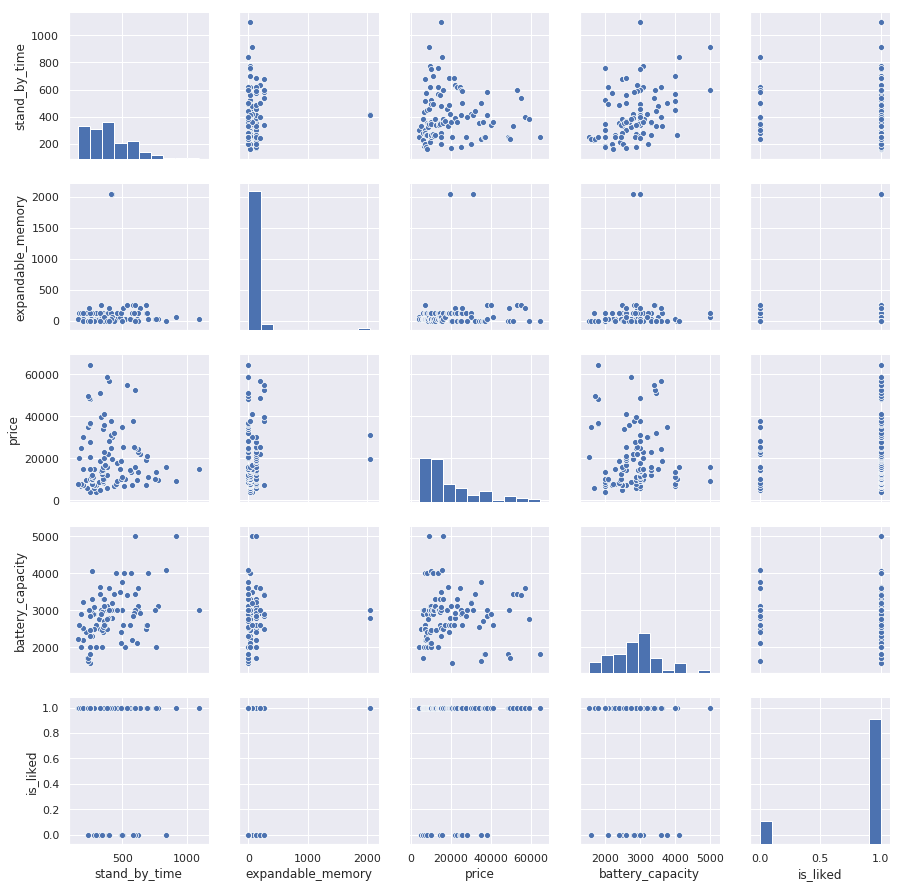

In [0]:
ax = sns.pairplot(df_thin, diag_kind='hist')

what the above cell code is doing is plotting the histograms for all the possible pair of the columns fields by treating one as x-axis and other as y-axis and vice-versa


so here in one view we have distribution of each pair-wise graphs

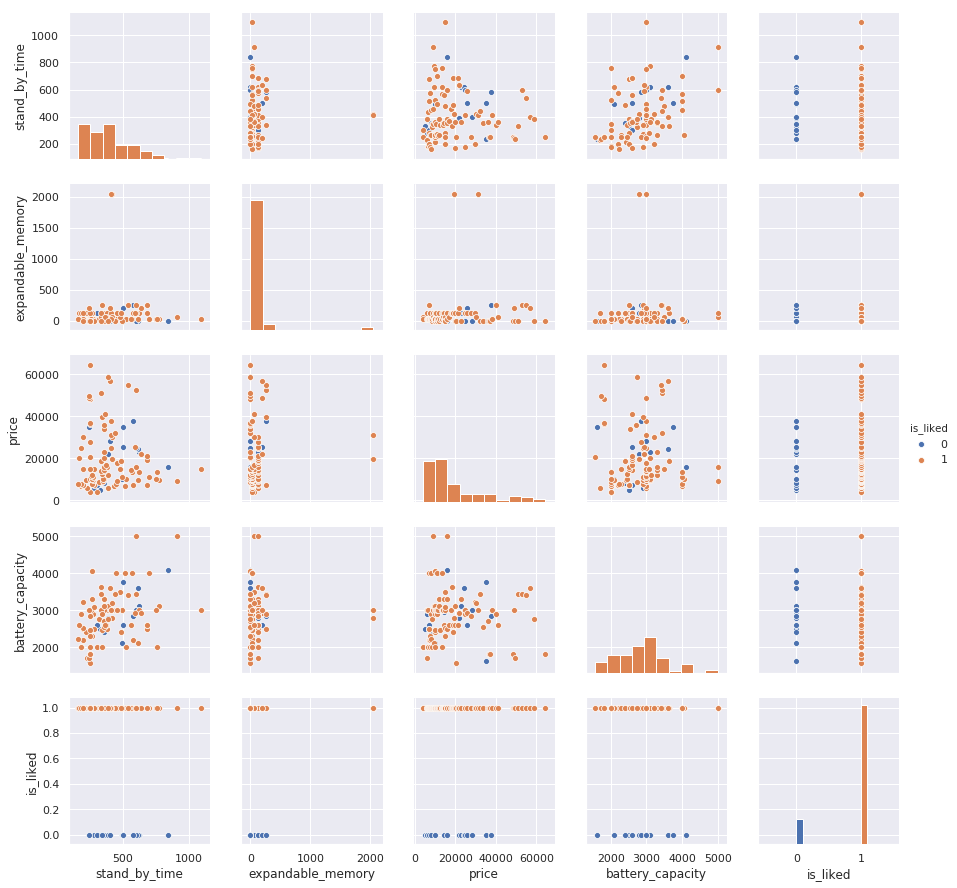

In [0]:
ax = sns.pairplot(df_thin, diag_kind='hist', hue='is_liked')

'hue' attribute is used to create differnces of colour for distinct values of elements in 'is_liked' attribute (as 'hue' is set for 'is_liked' attribute)

# The Python Debugger

In [0]:
def factorial(x):
  if x==1:
    return 1
  else:
    return x * factorial(x-1)

In [0]:
factorial(5)

120

In [0]:
import random
def code_to_debug():  # can be also called as testing function
  for i in range(10):
    x = random.random()
    factorial(x)



In [0]:
code_to_debug()

RecursionError: ignored

so here above we have an error regarding the maximum recursion depth exceeding the limit.

Now to debug this code we will use the python library called as ***'pdb' i.e python debugger*** as shown below

In [0]:
import random
def code_to_debug():  # can be also called as testing function
  import pdb; pdb.set_trace()  # here ';' is used to give two commands in same line
  for i in range(10):          # as like in shell script
    x = random.random()        # pdb.set_trace() should be written at a point from
    factorial(x)               # we want to start the debugging



In [0]:
code_to_debug()

> <ipython-input-12-0bbb6d269075>(4)code_to_debug()
-> for i in range(10):          # as like in shell script
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) help c
c(ont(inue))
        Continue execution, only stop when a breakpoint is encountered.
(Pdb) l
  1  	import random
  2  	def code_to_debug():  # can be also called as testing function
  3  	  import pdb; pdb.set_trace()  # here ';' is used to give two commands in s

RecursionError: ignored

we use '?' for getting all the options that we have available in 'pdb' 

to get help regardin any available option we use 'help' option as below
'help <option need help>' for eg.
'help c'

option 'l' shows which part of the program we are currently in.

option 'n' is for execution of next line 

any standard python command can be used in the box that 'pdb' execution prompted sey 'print(x)' to print the current value of 'x' during execution

'quit' command is used to stop debugging and run the rest of the program.

In [0]:
code_to_debug()

> <ipython-input-12-0bbb6d269075>(4)code_to_debug()
-> for i in range(10):          # as like in shell script
(Pdb) n
> <ipython-input-12-0bbb6d269075>(5)code_to_debug()
-> x = random.random()        # pdb.set_trace() should be written at a point from
(Pdb) n
> <ipython-input-12-0bbb6d269075>(6)code_to_debug()
-> factorial(x)               # we want to start the debugging
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) help 

BdbQuit: ignored

the above debugging show that the error is because of the 'random.random()' function as it generates the negative number also for which our 'factorial' function can't calculate the factiorial and result in error of 'recursion limit exceed'

In [0]:
# improved defination of factorial function
def factorial_debugged(x):
  if (not isinstance(x, int)):
    print("This method only supports positive integers")
    return -1
  if (x == 0):
    return 1
  else:
    return x * factorial_debugged(x-1)

In [0]:
import random
def code_to_debug():  # can be also called as testing function
  import pdb; pdb.set_trace()  # here ';' is used to give two commands in same line
  for i in range(10):          # as like in shell script
    x = random.random()        # pdb.set_trace() should be written at a point from
    factorial_debugged(x)               # we want to start the debugging



In [0]:
code_to_debug()

> <ipython-input-19-f9550cc11b1f>(4)code_to_debug()
-> for i in range(10):          # as like in shell script
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) help c
c(ont(inue))
        Continue execution, only stop when a breakpoint is encountered.
(Pdb) c
This method only supports positive integers
This method only supports positive integers
This method only supports positive integers
This method only supports positive int

So this is how the debugging works, first we create the test function using the 'pdb' module to debug the code


There is another mode in debugging concept which we can used  to debug the code called as '%xmode Verbose'

actually it is a magic  commancd of jupyter lab, to report any Exception in verbose(detailed) mode

In [0]:
%xmode Verbose

Exception reporting mode: Verbose


In [0]:
import random
def code_to_debug():                               # can be also called as testing function
  for i in range(10):     
    x = random.random()       
    factorial(x) 

In [0]:
code_to_debug()

RecursionError: ignored

so in above report of exeption or error value of 'x' is also shown which is not the case with normal Exception mode

# plotting vectors

In [0]:
import numpy as np
import matplotlib.pyplot as plt

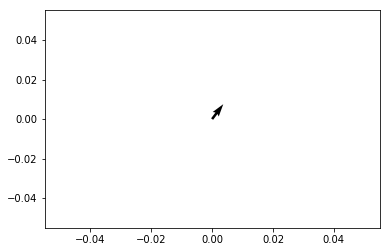

In [0]:
plt.quiver(0,0,3,4)
plt.show()

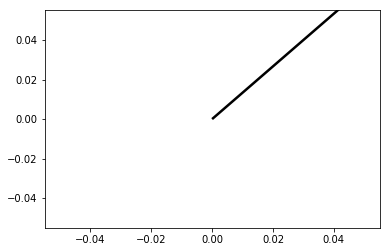

In [0]:
plt.quiver(0,0,3,4,scale_units='xy',angles='xy',scale=1)
plt.show()

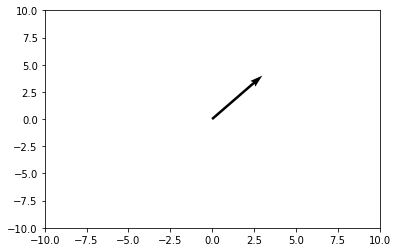

In [0]:
plt.quiver(0,0,3,4,scale_units='xy',angles='xy',scale=1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

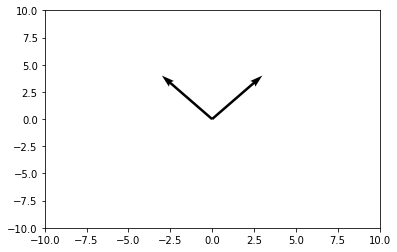

In [0]:
plt.quiver(0,0,3,4,scale_units='xy',angles='xy',scale=1)
plt.quiver(0,0,-3,4,scale_units='xy',angles='xy',scale=1)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

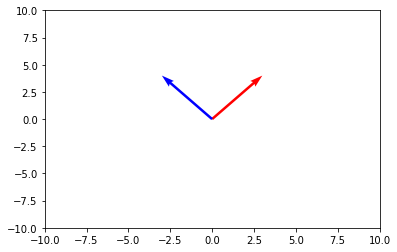

In [0]:
plt.quiver(0,0,3,4,scale_units='xy',angles='xy',scale=1,color='r')
plt.quiver(0,0,-3,4,scale_units='xy',angles='xy',scale=1,color='b')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [0]:
# code to ploat all the vectors given in a list where each vector is represented by a tuple having coordinates of start and end point
# note that print((1,3)+(92,4)) is = (1, 3, 92, 4) and not = (93,7)
def plot_vectors(vecs):
  n_array = np.array(vecs)
  color_vec=['r','b','y','g']
  k=0
  for i in n_array:
    plt.quiver(i[0],i[1],i[2],i[3],scale_units='xy',angles='xy',scale=1,color=color_vec[k%len(color_vec)])
    k+=1
  plt.xlim(-10,15)
  plt.ylim(-10,15)
  plt.show()



In [0]:
s = np.array([(1,3,4),(1,2,3)])

In [0]:
print(s)

[[1 3 4]
 [1 2 3]]


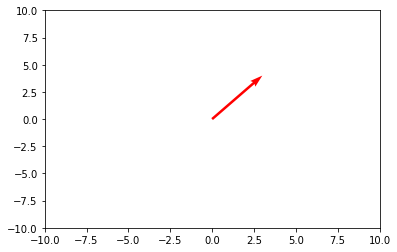

In [0]:
plot_vectors([(0,0,3,4)])

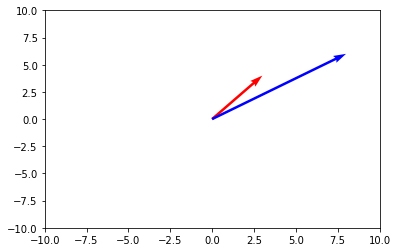

In [0]:
plot_vectors([(0,0,3,4),(0,0,8,6)])

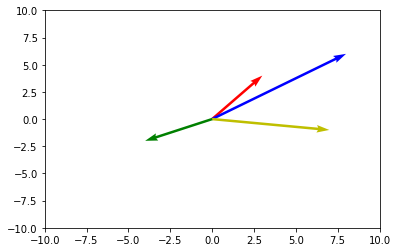

In [0]:
plot_vectors([(0,0,3,4),(0,0,8,6),(0,0,7,-1),(0,0,-4,-2)])

In [0]:
plt.quiver?

# Addition and subtraction of vectors

In [0]:
vecs = [(0,0,3,4),(0,0,8,6),(0,0,7,-1),(0,0,-4,-2)]

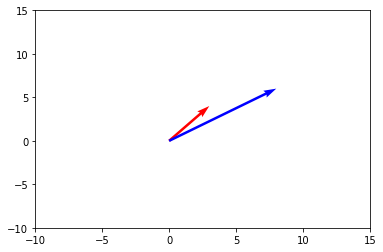

In [0]:
plot_vectors([vecs[0],vecs[1]])

In [0]:
# changing vecs to numpy array
# as data type of vectors are tuples here so adding them will concatinate them
vecs = [np.array([0,0,3,4]),np.array([0,0,8,6]),np.array([0,0,7,-1]),np.array([0,0,-4,-2])]

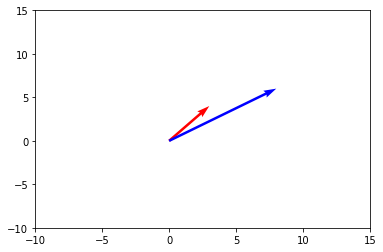

In [0]:
plot_vectors([vecs[0],vecs[1]])

In [0]:
vecs[0] + vecs[1]

array([ 0,  0, 11, 10])

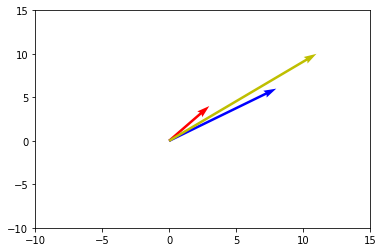

In [0]:
plot_vectors([vecs[0],vecs[1],vecs[0] + vecs[1]])

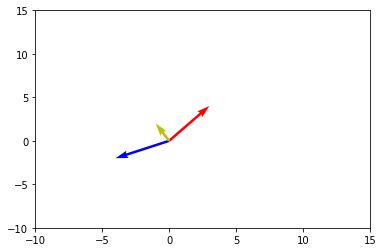

In [0]:
plot_vectors([vecs[0],vecs[3],vecs[0] + vecs[3]])

here we see that the resultant vector is smaller than the two vectors contributing them and this is because these two vectors have an obtuse angle between them and hence they are quite opposite to them and not contributing to each other rather they actually diminish the effect of the resultant whereas in the above representation where we have the resultant greater than the participating vectors is because of the angle between them is accute and hence they are some sort of contributing in the resultant rather than diminishig them. one more example below.

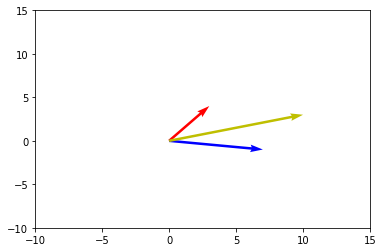

In [0]:
plot_vectors([vecs[0],vecs[2],vecs[0] + vecs[2]])

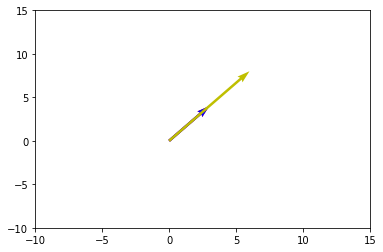

In [0]:
# adding vector to itself will double the magnitude of the vector
plot_vectors([vecs[0],vecs[0],vecs[0] + vecs[0]])

so from above we get that the more alinged the vectors are the more powerfull resultant we get i.e the larger is the added sum.

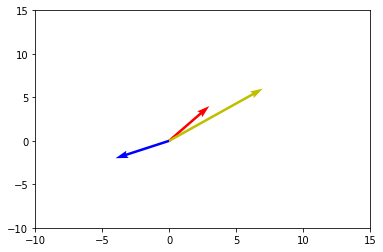

In [0]:
plot_vectors([vecs[0],vecs[3],vecs[0] - vecs[3]])

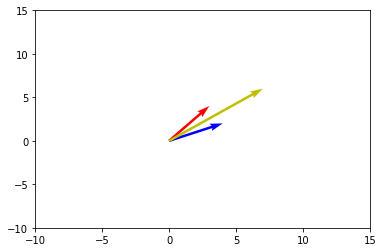

In [0]:
# this is equivalent to 
plot_vectors([vecs[0],-vecs[3],vecs[0] + (-vecs[3])])

what we see in the above figure is that the resultant (the green vector) remains the same(and the red one too) while one vector (that is the blue one ) has its direction changed as we have reverses its direction by mulitplying it with the negative one.


Also note that the vector addition is commutative while vector subtraction is not i.e for two vectors a and b we have a+b=b+a but not a-b=b-a

# vector dot product

In [0]:
vecs = [np.array([0,0,3,4]),np.array([0,0,8,6]),np.array([0,0,7,-1]),np.array([0,0,-4,-2])]

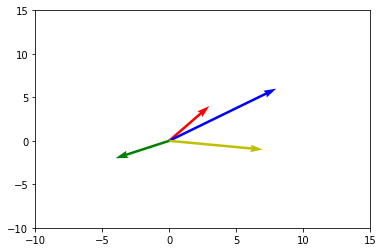

In [0]:
plot_vectors(vecs)

In [0]:
a= np.array([3,4])  #since in taking the dot products we only 
b=np.array([4,-1]) # need the final coordinates of the vectors
                   # or the difference of the final and initial 
                  #coordinates if the origin is shifted

here below we are using the latex notation, where each vector is written by puttin a '\' before it and vector is represented by 'vec' word and everythin in latex should be between the '$' sign as used in this text, the below equation is for 2-d only vectors dot products.

$\vec{a}\cdot\vec{b} = |\vec{a}||\vec{b}|\cos(\theta)= a_xb_x+a_yb_y$

In [0]:
a_dot_b=np.dot(a,b)

In [0]:
print(a_dot_b)

8


Projection of vector 'a' over vector 'b' is given as 

$\vec{a}_b=|\vec{a}|\cos(\theta)=|\vec{a}|\frac{\vec{a}\cdot\vec{b}}{|\vec{a}||\vec{b}|}=\frac{\vec{a}\cdot\vec{b}}{|\vec{b}|}$

In [0]:
# to calculate the magnitude of the vector we use 'np.linalg.norm('vector') mehtod as below
a_b = np.dot(a,b)/np.linalg.norm(b)

In [0]:
print(a_b)

1.9402850002906638


Now we want to plot the dot product of the vector but sinc for plotting the vector we want to know the both the magnitude and the direction of the vector and the direction of any vector can be obtained by its unit vector and then multiplying that vector with the magnitude that we obtained above of $\vec{a}_b$ = $|\vec{a}_b|=a_b\hat{b}=a_b\frac{\vec{b}}{|\vec{b}|}=\frac{\vec{a}\cdot\vec{b}}{|\vec{b}|\vec{b}|}\vec{b}$

In [0]:
vec_a_b=(a_b/np.linalg.norm(b))*(b)

In [0]:
print(vec_a_b)

[ 1.88235294 -0.47058824]


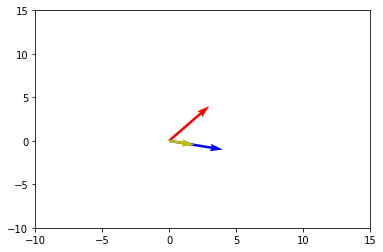

In [55]:
# as a=[3,4] and b=[4,-1] and we still need the starting coordintes
# to show them on graph therefore used '0,0' as origin 
# the yellow vector is the projection obtained
plot_vectors([np.array([0,0,3,4]),np.array([0,0,4,-1]),np.array([0,0,1.88235294,-0.47058824])])

If the projection of a vector over another vector is negative then it shows that the two vecotr are not aligned to each other.

In [56]:
# for example 
np.dot(np.array([5,4]),np.array([-3,-2]))

-23

note that projections  also  depends on the magnitude(apart from alignment(angle between them) only ) of the vectors whose projections we want to obtained

note that dot products of the orthgonal vectors is equal to zero and therefore the projections of one of them over the other is also zero.